# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [2]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

zsh:1: command not found: wget


# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [3]:
file_path = './HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
df = pd.read_csv(file_path)
missing_values = df.isnull().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [4]:
df.fillna(df.mean(), inplace=True)
#ولی چیزی عوض نمیشه

Get a brief description of the dataset

In [5]:
# TODO: you can use .info() and .description()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [7]:
# TODO: drop MEDV and convert to numpy array
X = df.drop(columns=['MEDV'])
X_array = X.values
X_array

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

<Axes: >

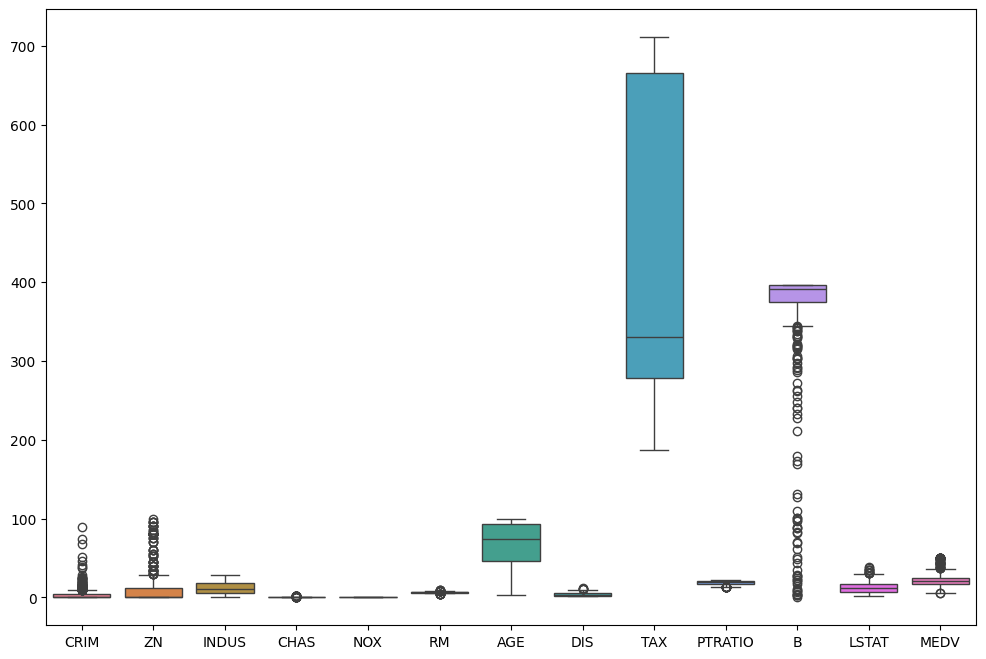

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(df)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

add polynomial features to increase model complexity!

In [12]:
degree = 2 
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [13]:
# TODO: extract the MEDV
y = df['MEDV']
y_array = y.values



Split the dataset into two parts such that the training set contains 80% of the samples.

In [14]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_array, test_size=0.2, random_state=42)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [15]:
# TODO: Use sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

[ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.63408849e+00  1.95669949e+00
 -2.07628197e+00 -4.87583

/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_31768/1063339910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(coefficients)), y=coefficients, palette='viridis')


<Axes: >

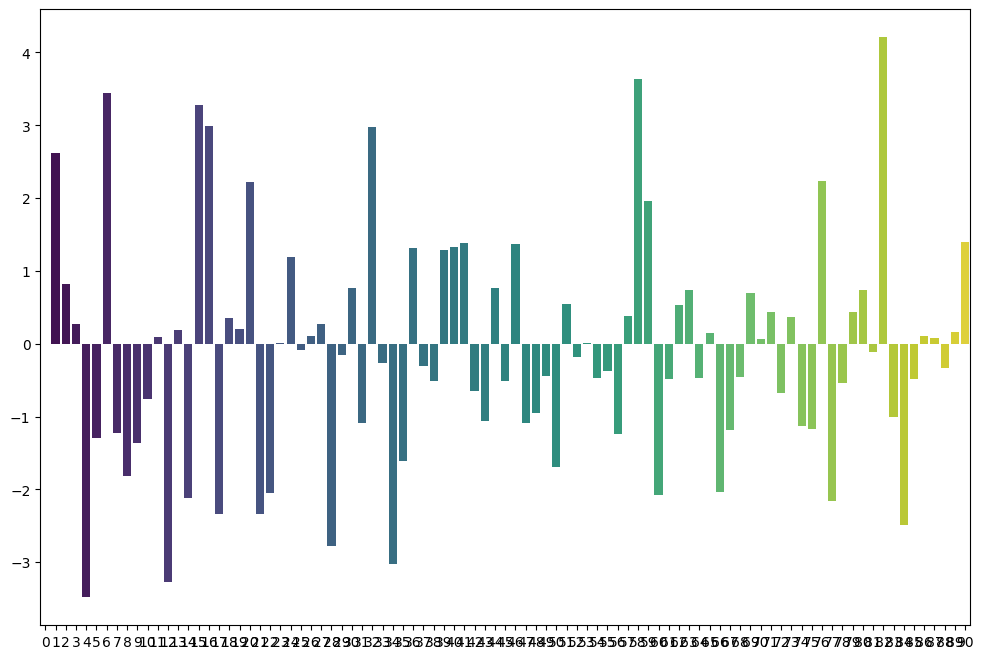

In [16]:
coefficients = linear_regressor.coef_
print(coefficients)
plt.figure(figsize=(12, 8))
sns.barplot(x=range(len(coefficients)), y=coefficients, palette='viridis')

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [35]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred = linear_regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print("R² score:", r2_train)
print("Mean Squared Error:", mse_train)

R² score: 0.9233615957926449
Mean Squared Error: 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [36]:
y_test_pred = linear_regressor.predict(X_test)
y_test_pred

array([26.60760472, 39.62214268, 18.71401934, 21.00627478, 15.36932115,
       18.14967249, 19.2680689 , 14.04520907, 20.41411804, 19.68358046,
       19.34721612, 17.80080883,  9.52923494, 17.56130221, 17.61765281,
       23.1886407 , 19.83784911,  9.82571722, 48.00938013, 13.01200313,
       24.67113881, 28.75366122, 15.14797668, 19.48768303, 16.8711114 ,
       16.54597743, 17.07120558, 13.34377675, 16.66485127, 19.34855953,
       18.50229727, 23.95889069, 15.48239335, 25.70102382, 13.69224402,
       17.48588361, 33.1589375 , 20.10130817, 20.24277819, 21.68697931,
       16.91569466, 31.33039866, 53.78155342, 15.35787882, 27.30502419,
       15.90970181, 14.76748839, 23.49841731, 17.57527936, 29.19894908,
       19.95253249, 33.61207695, 17.02933983, 26.86934524, 44.01327048,
       23.0722288 , 13.43102214, 32.42020215, 25.15187612, 12.20309801,
       25.03914004, 29.01333968, 31.99975955, 14.25741358, 27.2478974 ,
       13.81980117, 14.35877776, 24.56841459, 29.12596225, 12.07

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [38]:
# TODO: Use Lasso from sklearn library
lasso_regressor = Lasso(alpha=0.5)
lasso_regressor.fit(X_train, y_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("R² score:", r2_test_lasso)
print("Mean Squared Error:", mse_test_lasso)

R² score: 0.778718266278262
Mean Squared Error: 16.227426678090257


Get the coefficients of the variables and visualize it.

[ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.24304235 -0.
  0.46962857]


/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_30716/1455562103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(coefficients)), y=coefficients, palette='viridis')


<Axes: >

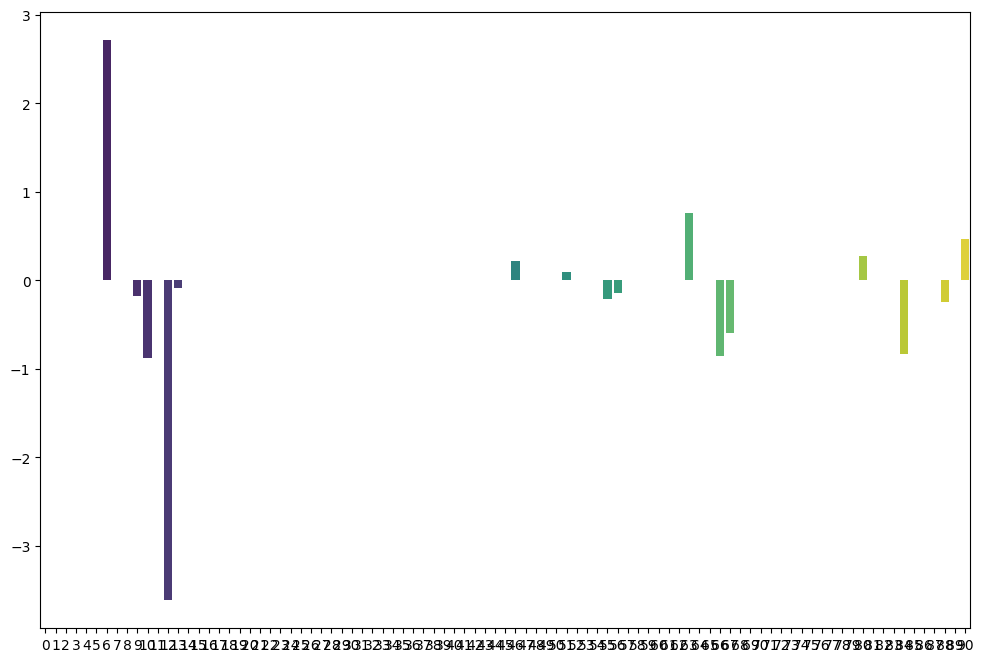

In [39]:
coefficients = lasso_regressor.coef_
print(coefficients)
plt.figure(figsize=(12, 8))
sns.barplot(x=range(len(coefficients)), y=coefficients, palette='viridis')

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.

1- کلا خاصیت ال وان اینه فقط فیچرهای مناسب انتخاب بشن به همین دلیل اکثز فیچرها صفر میشن

2- وقتی الفا زیاد میشه ضریبهای بیشتری صفر میشن،
وقتی الفا کم یشه ضریبهای کمتری صفر میشن

Get the score value on train *dataset*


In [40]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred_lasso = lasso_regressor.predict(X_train)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)

print("R² score:", r2_train_lasso)
print("Mean Squared Error:", mse_train_lasso)

R² score: 0.8171286694481938
Mean Squared Error: 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [41]:
y_test_pred_lasso = lasso_regressor.predict(X_test)
y_test_pred_lasso

array([25.01553605, 32.02170508, 16.56431707, 23.67545781, 17.13464034,
       21.69118954, 18.08272601, 14.79576716, 20.40693987, 19.6387817 ,
       21.53217387, 19.92343501,  6.64235117, 21.28994714, 19.61841959,
       22.15653103, 18.10047426, 11.57157362, 42.41465504, 16.42067495,
       21.39943226, 25.60136064, 15.78693485, 22.04815612, 17.9021186 ,
       17.00238679, 19.88982538, 13.39822411, 21.17351703, 19.18396855,
       18.45930572, 24.45954182, 22.28497567, 22.26103013, 14.87175003,
       17.51351063, 32.12600448, 20.57590791, 22.56516819, 20.96313305,
       15.55620789, 27.56743981, 44.34319575, 18.69292057, 24.52131935,
       17.12080258, 16.94276939, 24.60012608, 18.02835641, 28.77188928,
       21.29219328, 31.99034286, 17.89886858, 25.3993675 , 39.45589001,
       22.16073425, 17.33354312, 28.94005254, 23.43768009, 17.00480941,
       24.78746672, 31.5308728 , 28.44268606, 19.11754198, 26.06453555,
       17.74025689, 17.46661041, 24.07595784, 27.21904407, 12.41

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [43]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=10)
ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
print("R² score:", r2_test_ridge)
print("Mean Squared Error:", mse_test_ridge)

R² score: 0.793955306875648
Mean Squared Error: 15.110036846916515


Get the coefficients of the variables and visualize it.

[ 0.          0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735
  3.30888276 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162
 -2.94077889  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989
  0.19857273 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445
  0.53227529  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418
  0.11128147 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907
  0.65774546  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857
 -0.01735362 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317
 -0.87633987 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303
 -0.5612907  -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939
 -0.72743981 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285
 -1.39082276 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313
  0.12071674  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718
 -0.01954442 -0.25679014  0.78714857  0.62433033  1.952

/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_30716/746441317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(coefficients)), y=coefficients, palette='viridis')


<Axes: >

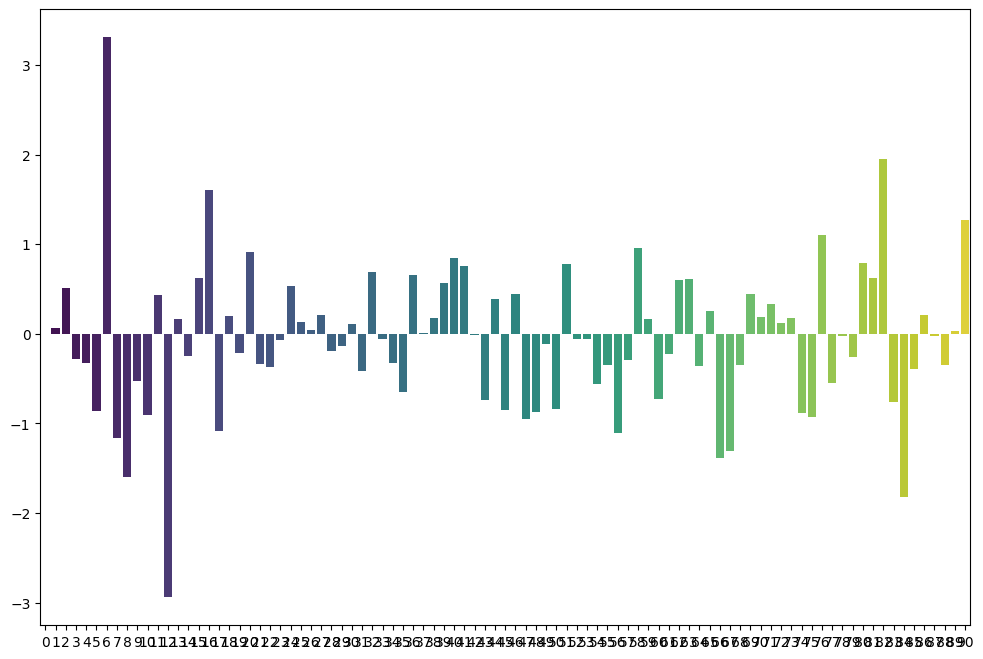

In [45]:
coefficients = ridge_regressor.coef_
print(coefficients)
plt.figure(figsize=(12, 8))
sns.barplot(x=range(len(coefficients)), y=coefficients, palette='viridis')

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

        Your answer goes here
ال وان ضریب هارو میبرهبه نزیکیه صفر میبره و چه بسا حتی صفر میکنه تا فیچرهای نامهم حذف بشوند

ال دو یه مقدار ثابتی از همه کم میکنه و ملایمتر مدل رو میستزه

Get the score value on train *dataset*

In [46]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred_ridge = ridge_regressor.predict(X_train)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
print("R² score:", r2_train_ridge)
print("Mean Squared Error:", mse_train_ridge)

R² score: 0.9143940529441623
Mean Squared Error: 7.436880009084566


Predict the value of "y" for each "x" belonging to the "testing" set



In [47]:
y_test_pred_ridge = ridge_regressor.predict(X_test)
y_test_pred_ridge

array([26.64874045, 37.58387034, 19.27657644, 21.94197185, 15.3028101 ,
       20.12028532, 19.06550135, 13.09220054, 21.53629599, 19.59853597,
       19.98066811, 17.71773856,  7.45618135, 19.4698435 , 17.83085991,
       22.41342776, 19.03460611, 10.83733093, 47.87734976, 13.23733086,
       25.94978663, 28.67626209, 15.62739061, 20.87266644, 16.88618107,
       16.70243714, 18.15202381, 12.99400863, 19.06044753, 19.1619615 ,
       18.49185044, 23.96483655, 16.81029968, 24.22140047, 14.71608764,
       17.14764076, 33.00621736, 20.36005585, 21.56765845, 22.00579786,
       16.87716829, 30.83029389, 52.86535583, 16.40416721, 26.70438602,
       16.00962769, 15.37456958, 24.22203195, 18.0413712 , 28.35774744,
       18.65466298, 33.07812494, 17.01116837, 25.34703163, 43.22198358,
       23.00525594, 14.66623572, 32.34427145, 25.00498764, 14.21572885,
       24.95594853, 33.4162596 , 30.78344757, 16.16942493, 25.19231399,
       16.02456508, 14.58662856, 24.41159615, 30.32473275, 12.38

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [52]:
basic_train_rmse = mean_squared_error(y_train, y_train_pred)**0.5
basic_train_r2 = r2_score(y_train, y_train_pred)
basic_test_rmse = mean_squared_error(y_test, y_test_pred)**0.5
basic_test_r2 = r2_score(y_test, y_test_pred)

lasso_train_rmse = mean_squared_error(y_train, y_train_pred_lasso)**0.5
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_rmse = mean_squared_error(y_test, y_test_pred_lasso)**0.5
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

ridge_train_rmse = mean_squared_error(y_train, y_train_pred_ridge)**0.5
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_rmse = mean_squared_error(y_test, y_test_pred_ridge)**0.5
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

data = {
    'Model': ['Basic Regression', 'Lasso Regression', 'Ridge Regression'],
    'Test RMSE': [basic_test_rmse, lasso_test_rmse, ridge_test_rmse],
    'Train RMSE': [basic_train_rmse, lasso_train_rmse, ridge_train_rmse],
    'Test R²': [basic_test_r2, lasso_test_r2, ridge_test_r2],
    'Train R²': [basic_train_r2, lasso_train_r2, ridge_train_r2],
}

performance_df = pd.DataFrame(data)
print(performance_df)

              Model  Test RMSE  Train RMSE   Test R²  Train R²
0  Basic Regression   4.257003    2.580279  0.752882  0.923362
1  Lasso Regression   4.028328    3.985807  0.778718  0.817129
2  Ridge Regression   3.887163    2.727064  0.793955  0.914394


البته شما تو فایل خودتون ام-اس-ایی حساب کردید ولی اینجا گفته بودید ار-ام-اس-ای حساب کنیم

 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

          your answer goes here.
ال دو بهتره چون ار-ام-اس-ای کمتری داره و ار۲ بهتری داره